# Ordinary Least Squares [vif10]
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

linear_model.LinearRegression()

{'copy_X': True,   
 'fit_intercept': True,    
 'n_jobs': None,   
 'normalize': 'deprecated',    
 'positive': False}
 
 **_no hyperparameter tuning_**

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import platform
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize, space
import sys

from validation import cross_validation
from validation import performance_test_shifted

date_format = '%Y-%m-%d'

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
# config 'all', 'vif_5' or 'vif_10'
vif = 'vif_10'

# config model
ml_algorithm = linear_model.LinearRegression
filename = 'single-model_tau_ols'

In [3]:
my_os = platform.system()
print('OS in my system: ',my_os)

if my_os == 'Windows':
    path = str(pathlib.Path().absolute()) + '\\'
    slash = '\\'
else:
    path = str(pathlib.Path().absolute()) + '/'
    slash = '/'

path_3 = path.replace('4_modelling', '3_data_pre-processing')

OS in my system:  Linux


## Load Data

In [4]:
data_set = pd.read_csv(path_3 + 'data_artifacts' + slash + 'data_set_e_spx_3-' + vif + '.csv', index_col=0)

## Original Target Model (no forecast horizon)
### Time Series Cross Validation on Default/Optimal Model
_optimal model = default model_

In [5]:
opt_model_ori = ml_algorithm()
opt_model_ori.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [6]:
opt_model_ori_tscv_scores = cross_validation(data_set, opt_model_ori, 'tau_target_ori')
opt_model_ori_tscv_scores = pd.DataFrame(opt_model_ori_tscv_scores)
display(opt_model_ori_tscv_scores)
display(opt_model_ori_tscv_scores.describe())

,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
0,0.003750,0.002411,0.047766,0.037348,0.846733,0.921088
1,0.003513,0.003811,0.045645,0.048630,0.868696,0.858521
2,0.003273,0.004746,0.044033,0.055590,0.880785,0.856855
3,0.003417,0.009076,0.045204,0.080722,0.885738,0.654499
4,0.003931,0.007396,0.048757,0.072324,0.867938,0.662715
5,0.004383,0.003292,0.052364,0.045353,0.850062,0.828712
6,0.004349,0.003112,0.052292,0.045073,0.847136,0.870473
7,0.004242,0.002464,0.051521,0.039112,0.851163,0.880288
8,0.003948,0.007461,0.049233,0.070394,0.856336,0.470811
9,0.004364,0.003134,0.052182,0.044654,0.837038,0.832583


,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.003917,0.004690,0.048900,0.053920,0.859163,0.783654
std,0.000417,0.002404,0.003171,0.015241,0.015934,0.141551
min,0.003273,0.002411,0.044033,0.037348,0.837038,0.470811
25%,0.003572,0.003117,0.046175,0.044759,0.847867,0.704214
50%,0.003940,0.003552,0.048995,0.046991,0.853750,0.844719
75%,0.004322,0.006733,0.052017,0.066693,0.868506,0.867485
max,0.004383,0.009076,0.052364,0.080722,0.885738,0.921088


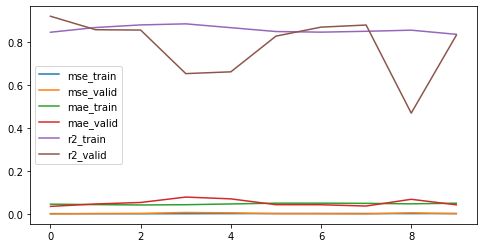

In [7]:
ax = opt_model_ori_tscv_scores[['mse_train', 'mse_valid', 'mae_train', 'mae_valid', 'r2_train', 'r2_valid']].plot(figsize=(8,4))

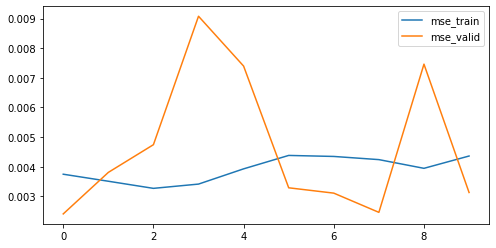

In [8]:
ax = opt_model_ori_tscv_scores[['mse_train', 'mse_valid']].plot(figsize=(8,4))

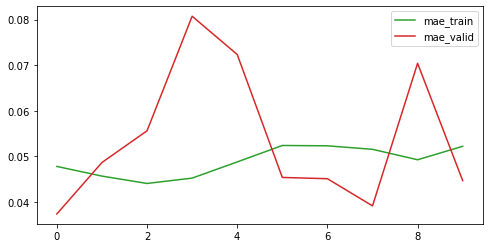

In [9]:
ax = opt_model_ori_tscv_scores[['mae_train', 'mae_valid']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

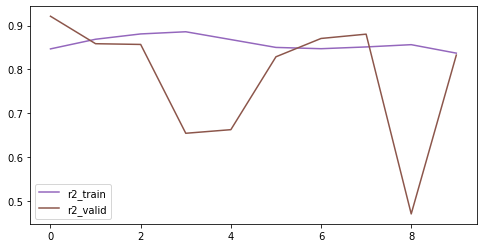

In [10]:
ax = opt_model_ori_tscv_scores[['r2_train', 'r2_valid']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

### Hyperparameter Optimization with Time Series Cross Validation
_model does not require hyperparameter tuning -> model is edtimated from training sample only to enhance comparability among all used machine learning techniques_

### Model Performance on Test Set

In [11]:
opt_model_ori_test_scores = performance_test_shifted(data_set, opt_model_ori, 'tau_target_ori')
opt_model_ori_test_scores = pd.DataFrame(opt_model_ori_test_scores)
display(opt_model_ori_test_scores)
display(opt_model_ori_test_scores.describe())

,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
0,0.003552,0.003847,0.046114,0.048908,0.866636,0.857190,0.366445,0.390847
1,0.003524,0.004739,0.045857,0.055592,0.871093,0.857040,0.425448,0.398404
2,0.003441,0.008950,0.045389,0.080062,0.884604,0.659321,0.330819,0.389643
3,0.004053,0.007490,0.049561,0.073038,0.862138,0.658438,0.286654,0.350913
4,0.004289,0.003213,0.051699,0.044719,0.852506,0.832800,0.281294,0.271136
5,0.004206,0.003065,0.051129,0.044704,0.851477,0.872422,0.288558,0.264059
6,0.004131,0.002500,0.050694,0.039343,0.853374,0.878553,0.291026,0.288146
7,0.003994,0.007899,0.049714,0.072809,0.855704,0.439752,0.199579,0.262714
8,0.004293,0.003103,0.051663,0.044336,0.844393,0.834226,0.245124,0.232709
9,0.004198,0.003188,0.050993,0.045985,0.839466,0.846780,0.245513,0.217757


,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.003968,0.004799,0.049281,0.054950,0.858139,0.773652,0.296046,0.306633
std,0.000334,0.002387,0.002517,0.014757,0.013328,0.143389,0.064764,0.069180
min,0.003441,0.002500,0.045389,0.039343,0.839466,0.439752,0.199579,0.217757
25%,0.003662,0.003124,0.046976,0.044708,0.851734,0.702690,0.254458,0.263051
50%,0.004092,0.003530,0.050204,0.047446,0.854539,0.840503,0.287606,0.279641
75%,0.004204,0.006802,0.051095,0.068505,0.865511,0.857152,0.320871,0.379961
max,0.004293,0.008950,0.051699,0.080062,0.884604,0.878553,0.425448,0.398404


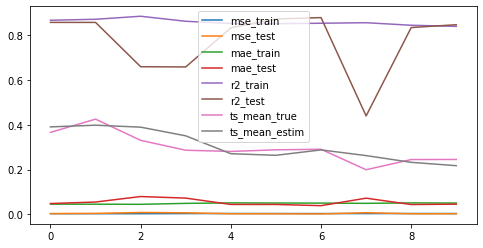

In [12]:
ax = opt_model_ori_test_scores.plot(figsize=(8,4))

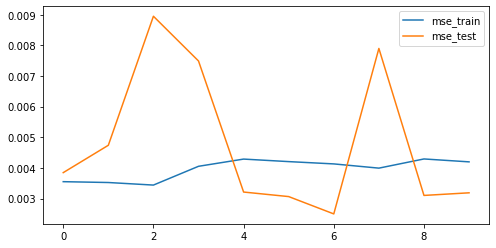

In [13]:
ax = opt_model_ori_test_scores[['mse_train', 'mse_test']].plot(figsize=(8,4))

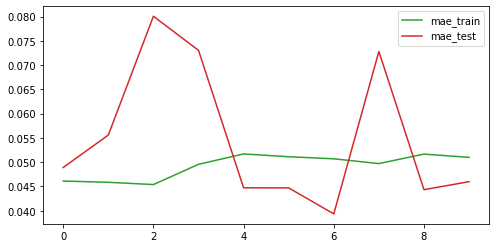

In [14]:
ax = opt_model_ori_test_scores[['mae_train', 'mae_test']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

(0.25, 0.9)

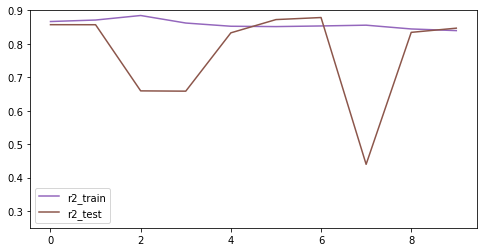

In [15]:
ax = opt_model_ori_test_scores[['r2_train', 'r2_test']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])
plt.ylim([0.25,0.9])

(0.2, 0.45)

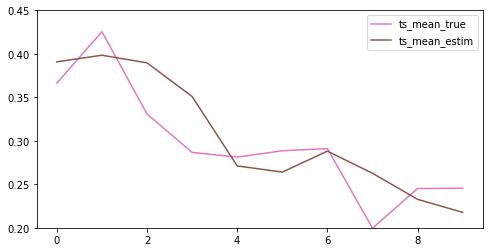

In [16]:
ax = opt_model_ori_test_scores[['ts_mean_true', 'ts_mean_estim']].plot(figsize=(8,4), color=['#e377c2', '#8c564b'])
plt.ylim([0.2,0.45])

### Data for Storage

In [17]:
results_ori = {'Model': [opt_model_ori],
            'fc_horizon': 0,
            'vif': [vif],
            'mse_tscv_t': [opt_model_ori_tscv_scores.mse_train.mean()],
            'mse_tscv_v': [opt_model_ori_tscv_scores.mse_valid.mean()],
            'mse_train': [opt_model_ori_test_scores.mse_train.mean()],
            'mse_test': [opt_model_ori_test_scores.mse_test.mean()],
               
            'mae_tscv_t': [opt_model_ori_tscv_scores.mae_train.mean()],
            'mae_tscv_v': [opt_model_ori_tscv_scores.mae_valid.mean()],
            'mae_train': [opt_model_ori_test_scores.mae_train.mean()],
            'mae_test': [opt_model_ori_test_scores.mae_test.mean()],
               
            'r2_tscv_t': [opt_model_ori_tscv_scores.r2_train.mean()],
            'r2_tscv_v': [opt_model_ori_tscv_scores.r2_valid.mean()],
            'r2_train': [opt_model_ori_test_scores.r2_train.mean()],
            'r2_test': [opt_model_ori_test_scores.r2_test.mean()],
               
            'opt_model': [opt_model_ori.get_params()],
            'ts_mean_true': opt_model_ori_test_scores.ts_mean_true.mean(),
            'ts_mean_estim': opt_model_ori_test_scores.ts_mean_estim.mean(),
              }

## ----------------------------------------------------------
## Predicted Target Model (one year forecast horizon)
### Time Series Cross Validation on Default Model

In [18]:
opt_model_hor = ml_algorithm()
opt_model_hor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [19]:
opt_model_hor_tscv_scores = cross_validation(data_set, opt_model_hor, 'tau_target_hor')
opt_model_hor_tscv_scores = pd.DataFrame(opt_model_hor_tscv_scores)
display(opt_model_hor_tscv_scores)
display(opt_model_hor_tscv_scores.describe())

,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
0,0.007986,0.006394,0.072092,0.060779,0.692779,0.765058
1,0.007464,0.009480,0.068983,0.077819,0.722016,0.715660
2,0.007709,0.017219,0.069621,0.110005,0.738448,0.329293
3,0.008867,0.013800,0.075410,0.101306,0.698437,0.359329
4,0.009344,0.009316,0.078027,0.079328,0.676427,0.511850
5,0.009320,0.006468,0.077668,0.065632,0.669131,0.726215
6,0.009055,0.005861,0.076663,0.061489,0.678268,0.705469
7,0.008186,0.013804,0.072404,0.097587,0.696476,0.001904
8,0.008169,0.005731,0.071789,0.060773,0.690399,0.692364
9,0.007763,0.005290,0.069218,0.058105,0.691126,0.743579


,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.008386,0.009336,0.073187,0.077282,0.695351,0.555072
std,0.000700,0.004221,0.003503,0.019329,0.020991,0.252395
min,0.007464,0.005290,0.068983,0.058105,0.669131,0.001904
25%,0.007819,0.005994,0.070163,0.060956,0.681301,0.397459
50%,0.008177,0.007892,0.072248,0.071726,0.691953,0.698917
75%,0.009008,0.012720,0.076350,0.093022,0.697947,0.723576
max,0.009344,0.017219,0.078027,0.110005,0.738448,0.765058


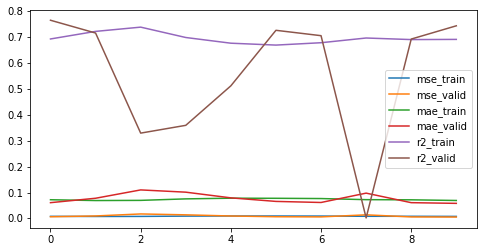

In [20]:
ax = opt_model_hor_tscv_scores[['mse_train', 'mse_valid', 'mae_train', 'mae_valid', 'r2_train', 'r2_valid']].plot(figsize=(8,4))

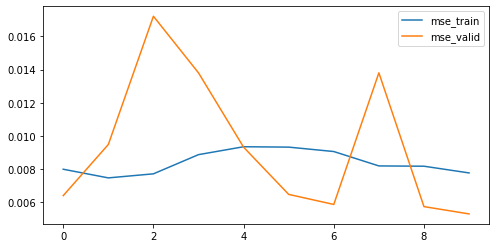

In [21]:
ax = opt_model_hor_tscv_scores[['mse_train', 'mse_valid']].plot(figsize=(8,4))

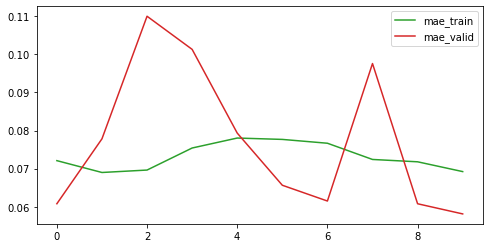

In [22]:
ax = opt_model_hor_tscv_scores[['mae_train', 'mae_valid']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

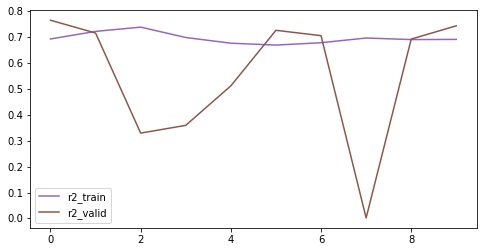

In [23]:
ax = opt_model_hor_tscv_scores[['r2_train', 'r2_valid']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

### Hyperparameter Optimization with Time Series Cross Validation
_model does not require hyperparameter tuning -> model is edtimated from training sample only to enhance comparability among all used machine learning techniques_

### Model Performance on Test Set

In [24]:
opt_model_hor_test_scores = performance_test_shifted(data_set, opt_model_hor, 'tau_target_hor')
opt_model_hor_test_scores = pd.DataFrame(opt_model_hor_test_scores)
display(opt_model_hor_test_scores)
display(opt_model_hor_test_scores.describe())

,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
0,0.007736,0.009625,0.070480,0.078730,0.709995,0.711330,0.429797,0.392508
1,0.007684,0.017072,0.069708,0.109436,0.738218,0.335009,0.335499,0.421596
2,0.008671,0.013892,0.074650,0.101743,0.700236,0.355080,0.293080,0.388094
3,0.009247,0.009282,0.077743,0.079075,0.677281,0.513659,0.287144,0.351081
4,0.009213,0.006202,0.077289,0.064200,0.670414,0.737445,0.295090,0.288362
5,0.008871,0.005889,0.075821,0.061538,0.681545,0.704071,0.292463,0.284077
6,0.008565,0.015534,0.074384,0.104030,0.686035,-0.123231,0.205042,0.302274
7,0.008698,0.006010,0.074581,0.062163,0.678596,0.677358,0.247086,0.258271
8,0.007838,0.005201,0.070232,0.057219,0.696142,0.747901,0.248710,0.238162
9,0.007448,0.019944,0.067851,0.123489,0.699544,-0.069121,0.342639,0.226446


,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.008397,0.010865,0.073274,0.084162,0.693801,0.458950,0.297655,0.315087
std,0.000664,0.005355,0.003442,0.023723,0.019935,0.329894,0.062015,0.068966
min,0.007448,0.005201,0.067851,0.057219,0.670414,-0.123231,0.205042,0.226446
25%,0.007761,0.006058,0.070294,0.062672,0.679333,0.340027,0.258318,0.264722
50%,0.008618,0.009453,0.074482,0.078903,0.691089,0.595509,0.292772,0.295318
75%,0.008827,0.015124,0.075528,0.103459,0.700063,0.709516,0.325397,0.378840
max,0.009247,0.019944,0.077743,0.123489,0.738218,0.747901,0.429797,0.421596


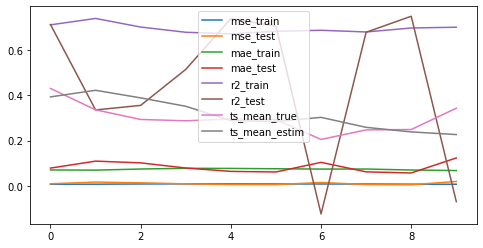

In [25]:
ax = opt_model_hor_test_scores.plot(figsize=(8,4))

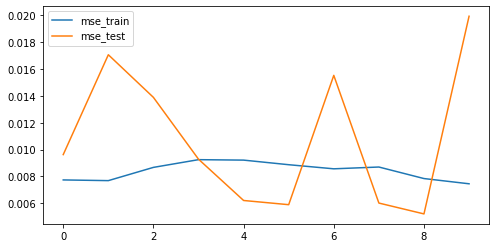

In [26]:
ax = opt_model_hor_test_scores[['mse_train', 'mse_test']].plot(figsize=(8,4))

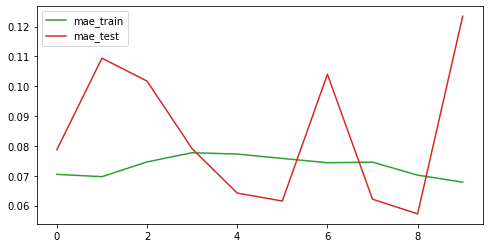

In [27]:
ax = opt_model_hor_test_scores[['mae_train', 'mae_test']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

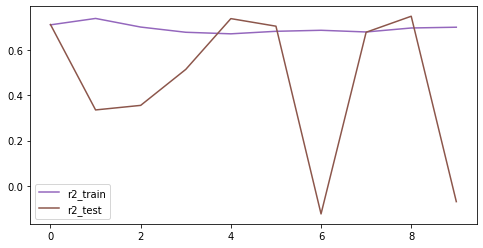

In [28]:
ax = opt_model_hor_test_scores[['r2_train', 'r2_test']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

(0.2, 0.45)

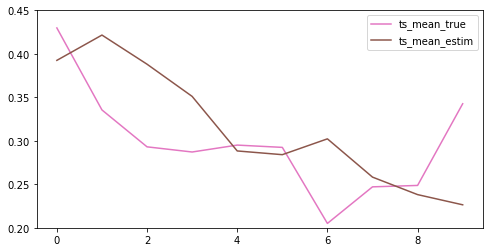

In [29]:
ax = opt_model_hor_test_scores[['ts_mean_true', 'ts_mean_estim']].plot(figsize=(8,4), color=['#e377c2', '#8c564b'])
plt.ylim([0.2,0.45])

### Data for Storage

In [30]:
results_hor = {'Model': [opt_model_ori],
            'fc_horizon': 1,
            'vif': [vif],
            'mse_tscv_t': [opt_model_hor_tscv_scores.mse_train.mean()],
            'mse_tscv_v': [opt_model_hor_tscv_scores.mse_valid.mean()],
            'mse_train': [opt_model_hor_test_scores.mse_train.mean()],
            'mse_test': [opt_model_hor_test_scores.mse_test.mean()],
               
            'mae_tscv_t': [opt_model_hor_tscv_scores.mae_train.mean()],
            'mae_tscv_v': [opt_model_hor_tscv_scores.mae_valid.mean()],
            'mae_train': [opt_model_hor_test_scores.mae_train.mean()],
            'mae_test': [opt_model_hor_test_scores.mae_test.mean()],
               
            'r2_tscv_t': [opt_model_hor_tscv_scores.r2_train.mean()],
            'r2_tscv_v': [opt_model_hor_tscv_scores.r2_valid.mean()],
            'r2_train': [opt_model_hor_test_scores.r2_train.mean()],
            'r2_test': [opt_model_hor_test_scores.r2_test.mean()],
               
            'opt_model': [opt_model_hor.get_params()],
            'ts_mean_true': opt_model_hor_test_scores.ts_mean_true.mean(),
            'ts_mean_estim': opt_model_hor_test_scores.ts_mean_estim.mean(),
              }

## Safe to Excel

In [31]:
results = pd.concat([pd.DataFrame(results_ori), pd.DataFrame(results_hor)])

display(results)

storage_name = filename + '_' + vif + '_' + str(datetime.today().day) + '.xlsx'

pd.DataFrame(results).to_excel(path + 'artifacts' + slash + storage_name, index=None)

,Model,fc_horizon,vif,mse_tscv_t,mse_tscv_v,mse_train,mse_test,mae_tscv_t,mae_tscv_v,mae_train,mae_test,r2_tscv_t,r2_tscv_v,r2_train,r2_test,opt_model,ts_mean_true,ts_mean_estim
0,LinearRegression(),0,vif_10,0.003917,0.004690,0.003968,0.004799,0.048900,0.053920,0.049281,0.054950,0.859163,0.783654,0.858139,0.773652,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}",0.296046,0.306633
0,LinearRegression(),1,vif_10,0.008386,0.009336,0.008397,0.010865,0.073187,0.077282,0.073274,0.084162,0.695351,0.555072,0.693801,0.458950,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}",0.297655,0.315087
